<center><h1>Python Pandas Tutorial</h1><center>

## Pandas is Python Data Analysis Library

pandas is an open source, BSD-licensed(can use for commercial means) library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

* Widely used
* Open Source
* Active Development
* Great Documentation

Home Page: http://pandas.pydata.org/

User Documentation: http://pandas.pydata.org/pandas-docs/stable/

Great Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

Best book by Panda's creator Wes Kinney (3rd Edition 2022): https://wesmckinney.com/book/

### Pandas resources

- https://www.dataschool.io/easier-data-analysis-with-pandas/ (video)

- Tutorials: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
  - ["Getting started"](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) - see also the "10 minutes to pandas" section
  - ["Modern Pandas"](http://tomaugspurger.github.io/modern-1-intro.html) tutorial
  - [Python Data Science Handbook - Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)
  
- [Pandas cheat-sheet](pandas_cheatsheet.pdf)


In [2]:
import pandas as pd

In [ ]:
#pd.reset_option('display.max_rows')
pd.options.display.max_rows = 40

In [ ]:
import numpy as np # another big library with various numeric functions

In [ ]:
import matplotlib.pyplot as plt

# Panda's two fundamental data structures: Series and DataFrame.

### Series
A Series is a one-dimensional array-like object containing a sequence of values (
similar types to NumPy types) and an associated array of data labels - index.
Simplest Series is from an array of data.

In [ ]:
# Let's create some Series!

In [ ]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

In [ ]:
s+4

In [ ]:
# NaN = Not a Number (used for missing numerical values)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [ ]:
s2 = s * 4 
s2

In [ ]:
s2**2

In [ ]:
### Often you want Series with an index identifying each data point with a label 

In [10]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [ ]:
## A  bit similar to dictionary isn't it?


In [11]:
labeledSeries['g']

31

In [12]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [13]:
labeledSeries.values

array([ 24,  77, -35,  31])

In [14]:
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [15]:
labeledSeries > 30

d    False
e     True
a    False
g     True
dtype: bool

In [16]:
# select values via a boolean array
labeledSeries[labeledSeries > 30]

e    77
g    31
dtype: int64

In [ ]:
# So Series behaves like a fixed-length, ordered dictionary with extra helper methods

In [17]:
'd' in labeledSeries

True

### Can create series from dictionary by simply passing to constructor pd.Series(mydict)

In [18]:
citydict = {'Riga': 650000, 'Tukums':20000, 'Ogre': 25000, 'Carnikava': 3000}
citydict

{'Riga': 650000, 'Tukums': 20000, 'Ogre': 25000, 'Carnikava': 3000}

In [19]:
cseries = pd.Series(citydict)
cseries

Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
dtype: int64

In [20]:
## Overwriting default index
clist = ['Jurmala', 'Riga', 'Tukums', 'Ogre', 'Daugavpils']
cseries2 = pd.Series(citydict, index = clist)
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [ ]:
# notice Carnikava was lost, since our index did not have it!
# and order was preserved from the given index list!

In [21]:
# For missing data
cseries2.isnull()

Jurmala        True
Riga          False
Tukums        False
Ogre          False
Daugavpils     True
dtype: bool

In [22]:
cseries2.dropna()

Riga      650000.0
Tukums     20000.0
Ogre       25000.0
dtype: float64

In [23]:
cseries2

Jurmala            NaN
Riga          650000.0
Tukums         20000.0
Ogre           25000.0
Daugavpils         NaN
dtype: float64

In [24]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils          NaN
Jurmala             NaN
Ogre            50000.0
Riga          1300000.0
Tukums          40000.0
dtype: float64

In [ ]:
# So NaN + number = NaN

In [25]:
cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Riga         650000
Tukums        20000
Ogre          25000
Carnikava      3000
Name: Latvian Cities, dtype: int64

In [26]:
cseries.index

Index(['Riga', 'Tukums', 'Ogre', 'Carnikava'], dtype='object', name='City')

In [27]:
cseries.index = ['CarnikavaIsNotaCity','OgreEatsHumans', 'RigaIsOld', 'TukumsSmukums']
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld               25000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [28]:
# Series values are mutable
cseries['RigaIsOld']=625000
cseries

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaIsOld              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

In [29]:
# How to rename individual index elements?
cseries.index[2]='RigaIsOldButFantastic'
cseries

TypeError: Index does not support mutable operations

In [ ]:
# We use Renaming method to rename individual elements

In [30]:
cseries.rename(index={'RigaIsOld':'RigaRocks'})

CarnikavaIsNotaCity    650000
OgreEatsHumans          20000
RigaRocks              625000
TukumsSmukums            3000
Name: Latvian Cities, dtype: int64

### Integer (Position-based) vs Label-based Indexes

Working with pandas objects indexed by integers is something that often trips up
new users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you might not expect the following code
to generate an error:



In [31]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [32]:
ser[-1]

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in
general without introducing subtle bugs. 

Here we have an index containing 0, 1, 2,
but inferring what the user wants (label-based indexing or position-based) is difficult:


In [33]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
## With a non-integer index there is no potential for ambiguity:

In [34]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [35]:
ser2[::-1]

c    2.0
b    1.0
a    0.0
dtype: float64

In [ ]:
## To keep things consistent, if you have an axis index containing integers, data selection
##will always be label-oriented. 

# For more precise handling, use loc (for labels) or iloc (for integers):

In [36]:
ser2.loc['b']

1.0

In [37]:
# Note: label indexing includes the endpoint, integer indexing does not
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [38]:
ser.iloc[:1]

0    0.0
dtype: float64

* loc gets rows (or columns) with particular labels from the index.

* iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

# Date Range creation

Date ranges are used as indexes for time series data:
* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#time-series

In [39]:
dates = pd.date_range('20180521', periods=15)
dates

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range('20210422', periods=15, freq="W")

DatetimeIndex(['2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01'],
              dtype='datetime64[ns]', freq='W-SUN')

In [42]:
pd.date_range('20200416', periods=7, freq="W-THU")

DatetimeIndex(['2020-04-16', '2020-04-23', '2020-04-30', '2020-05-07',
               '2020-05-14', '2020-05-21', '2020-05-28'],
              dtype='datetime64[ns]', freq='W-THU')

In [ ]:
# more on data_range frequency here
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

In [44]:
# Datetime is in the standard library (so all Python installations will have it)
from datetime import date
date.today()

datetime.date(2021, 4, 22)

In [45]:
# We can get a data range starting from today
months = pd.date_range(date.today().strftime("%Y-%m-%d"), periods = 10, freq='BMS')
months

DatetimeIndex(['2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-03', '2022-02-01'],
              dtype='datetime64[ns]', freq='BMS')

## Reading data files

In [46]:
city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [47]:
type(city_data)

pandas.core.frame.DataFrame

In [48]:
city_series = city_data.squeeze()
type(city_series)

pandas.core.series.Series

In [49]:
city_series.head()

Teritoriālā vienība
Rīga          637971
Daugavpils     83250
Jelgava        56383
Jēkabpils      22188
Jūrmala        49073
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [50]:
city_series["Salaspils"]

18071

In [51]:
city_series.sum()

2254964

In [52]:
city_series.describe()

count       186.000000
mean      12123.462366
std       47444.415575
min         503.000000
25%        2660.750000
50%        5238.500000
75%        9831.750000
max      637971.000000
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: float64

In [53]:
city_series[city_series < 1000]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [54]:
bitmap = city_series < 1000
bitmap.sample(20)   # kādēļ sample() nevis head()

Teritoriālā vienība
Alojas novads        False
Priekules novads     False
Viļaka               False
Iecavas novads       False
Brocēnu novads       False
Siguldas novads      False
Jaunjelgava          False
Auce                 False
Babītes novads       False
Strenču novads       False
Viļakas novads       False
Lielvārdes novads    False
Priekule             False
Ainaži                True
Krāslavas novads     False
Aknīste              False
Ludza                False
Mazsalaca            False
Ludzas novads        False
Kuldīga              False
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: bool

In [55]:
city_series[bitmap].sort_index()

Teritoriālā vienība
Ainaži       689
Ape          850
Durbe        503
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Subate       635
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns. 

Each column can be a different value type (numeric, string,
boolean, etc.). 

The DataFrame has both a row and column index;

Think of it 
as an ordered dict of Series all sharing the same row index. 

Underneath data is stored as one or more two-dimensional blocks (similar to ndarray) 
rather than a list, dict, or some other collection of
one-dimensional arrays.

In [ ]:
# Many ways of Data Frame creation
# One Common way is common is
# from a dict of equal-length lists or NumPy arrays

In [56]:
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
        'year': [1990, 2000, 2018, 2001, 2002, 2003],
        'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}

df = pd.DataFrame(data)
df

,city,year,popul
0,Riga,1990,0.90
1,Riga,2000,0.75
2,Riga,2018,0.62
3,Jurmala,2001,0.09
4,Jurmala,2002,0.08
5,Jurmala,2003,0.06


In [57]:
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [ ]:
# missing column simply given Nans

In [58]:
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [59]:
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [ ]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)


In [60]:
df2.iat[3,2]=0.063
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [61]:
df2["budget"]

0    300000
1    250000
2    400000
3    200000
4    250000
5    200000
Name: budget, dtype: int64

In [63]:
type(df2["budget"])

pandas.core.series.Series

In [64]:
# delete column by its name
del df2["budget"]
df2

,year,city,popul
0,1990,Riga,0.900
1,2000,Riga,0.750
2,2018,Riga,0.620
3,2001,Jurmala,0.063
4,2002,Jurmala,0.080
5,2003,Jurmala,0.060


In [65]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))
# We passed 15 rows of 5 random elements and set index to dates and columns to our basic list elements
df

,A,B,C,D,E
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109
2018-05-22,-0.751767,-0.557334,0.442134,1.336626,0.370737
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674


In [66]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
#most columns need matching length!

Categorical data type:
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    

In [68]:
s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [69]:
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [ ]:
## different datatypes for columns! 

In [70]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int64
E          category
F            object
dtype: object

In [71]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [72]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [73]:
df.index

DatetimeIndex(['2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04'],
              dtype='datetime64[ns]', freq='D')

In [74]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [75]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

In [76]:
df3.describe()

,A,C,D
count,7.0,6.000000,7.000000
mean,1.0,1.083333,13.000000
std,0.0,3.352859,13.490738
min,1.0,-5.000000,0.000000
25%,1.0,0.250000,2.500000
50%,1.0,2.000000,9.000000
75%,1.0,3.375000,20.500000
max,1.0,4.000000,36.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2018-05-21 to 2018-06-04
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       15 non-null     float64
 1   B       15 non-null     float64
 2   C       15 non-null     float64
 3   D       15 non-null     float64
 4   E       15 non-null     float64
dtypes: float64(5)
memory usage: 720.0 bytes


In [ ]:
# Transpose

In [78]:
df3.T

,0,1,2,3,4,5,6
A,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00,2018-05-23 00:00:00
C,1.0,4.0,3.5,3.0,NaN,0.0,-5.0
D,0,1,4,9,16,25,36
E,test,train,test,train,test,train,train
F,aha,aha,aha,aha,aha,aha,aha


In [79]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D,E
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109
2018-05-22,-0.751767,-0.557334,0.442134,1.336626,0.370737
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674


In [ ]:
## Sort by Axis in reverse

In [80]:
df.sort_index(axis=1,ascending=False)

,E,D,C,B,A
2018-05-21,1.739109,-0.858175,0.532527,0.019420,0.721049
2018-05-22,0.370737,1.336626,0.442134,-0.557334,-0.751767
2018-05-23,-0.930659,1.385145,-0.016768,0.391248,0.631718
2018-05-24,0.525265,0.483510,-0.921000,0.553484,0.867740
2018-05-25,-1.621497,1.873933,-2.168256,1.821448,1.648864
2018-05-26,-0.311827,0.858514,-0.713728,2.426672,-0.138812
2018-05-27,-0.169685,0.491469,-0.013709,-1.799046,-0.578854
2018-05-28,0.642694,0.177570,1.072547,-0.057727,0.328426
2018-05-29,-0.950209,2.131749,-0.145300,-0.494728,-0.233350
2018-05-30,0.714674,-3.808978,-0.810934,-0.441224,1.018628


In [81]:
df3.sort_values(by='C', ascending=False)

,A,B,C,D,E,F
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [ ]:
# Notice NaN gets last

### Selection 

Note: while standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

In [82]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [83]:
df3[:5]

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [84]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [85]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [86]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


## Selection by Label

For getting a cross section using a label:

In [87]:
df

,A,B,C,D,E
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109
2018-05-22,-0.751767,-0.557334,0.442134,1.336626,0.370737
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674


In [88]:
df.loc[dates[0]]

A    0.721049
B    0.019420
C    0.532527
D   -0.858175
E    1.739109
Name: 2018-05-21 00:00:00, dtype: float64

In [89]:
df.loc[dates[2:5]]

,A,B,C,D,E
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497


In [ ]:
## Selecting on a multi-axis by label:

In [90]:
df.loc[:, ['A','B','C']]

,A,B,C
2018-05-21,0.721049,0.019420,0.532527
2018-05-22,-0.751767,-0.557334,0.442134
2018-05-23,0.631718,0.391248,-0.016768
2018-05-24,0.867740,0.553484,-0.921000
2018-05-25,1.648864,1.821448,-2.168256
2018-05-26,-0.138812,2.426672,-0.713728
2018-05-27,-0.578854,-1.799046,-0.013709
2018-05-28,0.328426,-0.057727,1.072547
2018-05-29,-0.233350,-0.494728,-0.145300
2018-05-30,1.018628,-0.441224,-0.810934


In [91]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2018-05-23,0.631718,0.391248,-0.016768
2018-05-24,0.867740,0.553484,-0.921000
2018-05-25,1.648864,1.821448,-2.168256


In [92]:
df.loc['20180525':'20180601',['B','C']]

,B,C
2018-05-25,1.821448,-2.168256
2018-05-26,2.426672,-0.713728
2018-05-27,-1.799046,-0.013709
2018-05-28,-0.057727,1.072547
2018-05-29,-0.494728,-0.145300
2018-05-30,-0.441224,-0.810934
2018-05-31,-1.340706,0.241627
2018-06-01,0.497163,0.169295


In [ ]:
# Reduction in the dimensions of the returned object:

In [93]:
df.loc['20180526', ["B", "D"]]

B    2.426672
D    0.858514
Name: 2018-05-26 00:00:00, dtype: float64

In [ ]:
## Getting scalars (single values)

In [94]:
df.loc['20180526', ["D"]]

D    0.858514
Name: 2018-05-26 00:00:00, dtype: float64

In [ ]:
# same as above

In [95]:
df.at[dates[5],'D']

0.8585135893446018

In [ ]:
## Selection by Position

In [96]:
df.iloc[3]

A    0.867740
B    0.553484
C   -0.921000
D    0.483510
E    0.525265
Name: 2018-05-24 00:00:00, dtype: float64

In [ ]:
# By integer slices, acting similar to numpy/python:

In [97]:
df.iloc[2:5,:2]

,A,B
2018-05-23,0.631718,0.391248
2018-05-24,0.867740,0.553484
2018-05-25,1.648864,1.821448


In [ ]:
# By lists of integer position locations, similar to the numpy/python style:

In [98]:
df.iloc[[3,5,1],[1,4,2]]

,B,E,C
2018-05-24,0.553484,0.525265,-0.921000
2018-05-26,2.426672,-0.311827,-0.713728
2018-05-22,-0.557334,0.370737,0.442134


In [99]:
df.iloc[2,2]

-0.016768007585128503

In [ ]:
# For getting fast access to a scalar (equivalent to the prior method):

In [100]:
df.iat[2,2]

-0.016768007585128503

## Boolean Indexing

In [ ]:
## Using a single column’s values to select data.

In [101]:
df[df.A > 0.2]

,A,B,C,D,E
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674
2018-05-31,1.126841,-1.340706,0.241627,-1.034646,-0.836399
2018-06-01,0.266433,0.497163,0.169295,-1.463903,0.920211
2018-06-03,0.651787,-0.265913,0.271687,0.711061,1.030110


In [102]:
df[df > 0]

,A,B,C,D,E
2018-05-21,0.721049,0.019420,0.532527,NaN,1.739109
2018-05-22,NaN,NaN,0.442134,1.336626,0.370737
2018-05-23,0.631718,0.391248,NaN,1.385145,NaN
2018-05-24,0.867740,0.553484,NaN,0.483510,0.525265
2018-05-25,1.648864,1.821448,NaN,1.873933,NaN
2018-05-26,NaN,2.426672,NaN,0.858514,NaN
2018-05-27,NaN,NaN,NaN,0.491469,NaN
2018-05-28,0.328426,NaN,1.072547,0.177570,0.642694
2018-05-29,NaN,NaN,NaN,2.131749,NaN
2018-05-30,1.018628,NaN,NaN,NaN,0.714674


In [103]:
df[df > 1]

,A,B,C,D,E
2018-05-21,NaN,NaN,NaN,NaN,1.739109
2018-05-22,NaN,NaN,NaN,1.336626,NaN
2018-05-23,NaN,NaN,NaN,1.385145,NaN
2018-05-24,NaN,NaN,NaN,NaN,NaN
2018-05-25,1.648864,1.821448,NaN,1.873933,NaN
2018-05-26,NaN,2.426672,NaN,NaN,NaN
2018-05-27,NaN,NaN,NaN,NaN,NaN
2018-05-28,NaN,NaN,1.072547,NaN,NaN
2018-05-29,NaN,NaN,NaN,2.131749,NaN
2018-05-30,1.018628,NaN,NaN,NaN,NaN


In [105]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range('20180521', periods=15))
s1

2018-05-21       0
2018-05-22       1
2018-05-23       8
2018-05-24      27
2018-05-25      64
2018-05-26     125
2018-05-27     216
2018-05-28     343
2018-05-29     512
2018-05-30     729
2018-05-31    1000
2018-06-01    1331
2018-06-02    1728
2018-06-03    2197
2018-06-04    2744
Freq: D, dtype: int64

In [106]:
df

,A,B,C,D,E
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109
2018-05-22,-0.751767,-0.557334,0.442134,1.336626,0.370737
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674


In [107]:
df['F'] = s1
df

,A,B,C,D,E,F
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,0
2018-05-22,-0.751767,-0.557334,0.442134,1.336626,0.370737,1
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,8
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,27
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497,64
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,125
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,216
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,343
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,512
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,729


In [108]:
df['F']=42
df

,A,B,C,D,E,F
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,42
2018-05-22,-0.751767,-0.557334,0.442134,1.336626,0.370737,42
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,42
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,42
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497,42
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,42
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,42
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,42
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,42
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,42


In [109]:
df['G']=[x**3 for x in range(15)] # passing a fresh list to particular column
df

,A,B,C,D,E,F,G
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,42,0
2018-05-22,-0.751767,-0.557334,0.442134,1.336626,0.370737,42,1
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,42,8
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,42,27
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497,42,64
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,42,125
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,42,216
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,42,343
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,42,512
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,42,729


In [110]:
df.at[dates[1], 'A'] = 33
df

,A,B,C,D,E,F,G
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,42,0
2018-05-22,33.000000,-0.557334,0.442134,1.336626,0.370737,42,1
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,42,8
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,42,27
2018-05-25,1.648864,1.821448,-2.168256,1.873933,-1.621497,42,64
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,42,125
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,42,216
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,42,343
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,42,512
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,42,729


In [111]:
df.iat[4,4]= 42
df

,A,B,C,D,E,F,G
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,42,0
2018-05-22,33.000000,-0.557334,0.442134,1.336626,0.370737,42,1
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,42,8
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,42,27
2018-05-25,1.648864,1.821448,-2.168256,1.873933,42.000000,42,64
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,42,125
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,42,216
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,42,343
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,42,512
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,42,729


In [112]:
df3 = df.copy()
df3

,A,B,C,D,E,F,G
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,42,0
2018-05-22,33.000000,-0.557334,0.442134,1.336626,0.370737,42,1
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,42,8
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,42,27
2018-05-25,1.648864,1.821448,-2.168256,1.873933,42.000000,42,64
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,42,125
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,42,216
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,42,343
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,42,512
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,42,729


In [113]:
df3[df3 > 0.2 ] = -df3
df3

,A,B,C,D,E,F,G
2018-05-21,-0.721049,0.019420,-0.532527,-0.858175,-1.739109,-42,0
2018-05-22,-33.000000,-0.557334,-0.442134,-1.336626,-0.370737,-42,-1
2018-05-23,-0.631718,-0.391248,-0.016768,-1.385145,-0.930659,-42,-8
2018-05-24,-0.867740,-0.553484,-0.921000,-0.483510,-0.525265,-42,-27
2018-05-25,-1.648864,-1.821448,-2.168256,-1.873933,-42.000000,-42,-64
2018-05-26,-0.138812,-2.426672,-0.713728,-0.858514,-0.311827,-42,-125
2018-05-27,-0.578854,-1.799046,-0.013709,-0.491469,-0.169685,-42,-216
2018-05-28,-0.328426,-0.057727,-1.072547,0.177570,-0.642694,-42,-343
2018-05-29,-0.233350,-0.494728,-0.145300,-2.131749,-0.950209,-42,-512
2018-05-30,-1.018628,-0.441224,-0.810934,-3.808978,-0.714674,-42,-729


In [ ]:
# Missing Data
# pandas primarily uses the value np.nan to represent missing data. 
# It is by default not included in computations.

In [114]:
df['H'] = np.nan
df

,A,B,C,D,E,F,G,H
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,42,0,NaN
2018-05-22,33.000000,-0.557334,0.442134,1.336626,0.370737,42,1,NaN
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,42,8,NaN
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,42,27,NaN
2018-05-25,1.648864,1.821448,-2.168256,1.873933,42.000000,42,64,NaN
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,42,125,NaN
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,42,216,NaN
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,42,343,NaN
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,42,512,NaN
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,42,729,NaN


In [115]:
df.fillna(value=3.14)

,A,B,C,D,E,F,G,H
2018-05-21,0.721049,0.019420,0.532527,-0.858175,1.739109,42,0,3.14
2018-05-22,33.000000,-0.557334,0.442134,1.336626,0.370737,42,1,3.14
2018-05-23,0.631718,0.391248,-0.016768,1.385145,-0.930659,42,8,3.14
2018-05-24,0.867740,0.553484,-0.921000,0.483510,0.525265,42,27,3.14
2018-05-25,1.648864,1.821448,-2.168256,1.873933,42.000000,42,64,3.14
2018-05-26,-0.138812,2.426672,-0.713728,0.858514,-0.311827,42,125,3.14
2018-05-27,-0.578854,-1.799046,-0.013709,0.491469,-0.169685,42,216,3.14
2018-05-28,0.328426,-0.057727,1.072547,0.177570,0.642694,42,343,3.14
2018-05-29,-0.233350,-0.494728,-0.145300,2.131749,-0.950209,42,512,3.14
2018-05-30,1.018628,-0.441224,-0.810934,-3.808978,0.714674,42,729,3.14


In [ ]:
# there is also df.dropna() to drop any ROWS! with missing data

## Operations

DataFrame methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
        
Series methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    
Data Science Handbook:
* [Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)

In [116]:
df.mean()

A      2.517599
B      0.030489
C     -0.142662
D      0.132048
E      2.893937
F     42.000000
G    735.000000
H           NaN
dtype: float64

In [117]:
df.max()

A      33.000000
B       2.426672
C       1.386582
D       2.131749
E      42.000000
F      42.000000
G    2744.000000
H            NaN
dtype: float64

In [ ]:
# Other axis

In [118]:
df.mean(axis=1)

2018-05-21      6.307704
2018-05-22     11.084595
2018-05-23      7.351526
2018-05-24     10.072714
2018-05-25     21.596570
2018-05-26     24.160117
2018-05-27     36.561454
2018-05-28     55.309073
2018-05-29     79.186880
2018-05-30    109.667452
2018-05-31    148.593817
2018-06-01    196.198457
2018-06-02    252.500075
2018-06-03    320.199819
2018-06-04    397.848484
Freq: D, dtype: float64

In [ ]:
## String operations (df.str.*)

In [4]:
import numpy as np
str1 = pd.Series(['APPle', 'baNAna', np.NaN, 42, 'mangO'])
str1

0     APPle
1    baNAna
2       NaN
3        42
4     mangO
dtype: object

In [7]:
[name for name in dir(str1.str) if not name.startswith("_")]

['capitalize',
 'casefold',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'fullmatch',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize',
 'pad',
 'partition',
 'repeat',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'slice',
 'slice_replace',
 'split',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'wrap',
 'zfill']

In [8]:
help(str1.str.lower)

Help on method lower in module pandas.core.strings.accessor:

lower() method of pandas.core.strings.accessor.StringMethods instance
    Convert strings in the Series/Index to lowercase.
    
    Equivalent to :meth:`str.lower`.
    
    Returns
    -------
    Series or Index of object
    
    See Also
    --------
    Series.str.lower : Converts all characters to lowercase.
    Series.str.upper : Converts all characters to uppercase.
    Series.str.title : Converts first character of each word to uppercase and
        remaining to lowercase.
    Series.str.capitalize : Converts first character to uppercase and
        remaining to lowercase.
    Series.str.swapcase : Converts uppercase to lowercase and lowercase to
        uppercase.
    Series.str.casefold: Removes all case distinctions in the string.
    
    Examples
    --------
    >>> s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])
    >>> s
    0                 lower
    1              CAPITALS
    2   

In [121]:
str1.str.lower()

0     apple
1    banana
2       NaN
3       NaN
4     mango
dtype: object

In [122]:
str1.str.len()

0    5.0
1    6.0
2    NaN
3    NaN
4    5.0
dtype: float64

In [ ]:
## Apply

In [123]:
df.apply(lambda x: x*3) # ie same as df*3

,A,B,C,D,E,F,G,H
2018-05-21,2.163147,0.058259,1.597580,-2.574525,5.217326,126,0,NaN
2018-05-22,99.000000,-1.672001,1.326401,4.009879,1.112212,126,3,NaN
2018-05-23,1.895154,1.173743,-0.050304,4.155436,-2.791978,126,24,NaN
2018-05-24,2.603220,1.660453,-2.762999,1.450529,1.575795,126,81,NaN
2018-05-25,4.946593,5.464343,-6.504768,5.621800,126.000000,126,192,NaN
2018-05-26,-0.416436,7.280015,-2.141184,2.575541,-0.935480,126,375,NaN
2018-05-27,-1.736562,-5.397138,-0.041127,1.474408,-0.509054,126,648,NaN
2018-05-28,0.985279,-0.173180,3.217641,0.532711,1.928082,126,1029,NaN
2018-05-29,-0.700049,-1.484184,-0.435900,6.395246,-2.850626,126,1536,NaN
2018-05-30,3.055883,-1.323673,-2.432803,-11.426935,2.144023,126,2187,NaN


In [124]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [125]:
df.groupby('key')

In [126]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [127]:
help(df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis=0, level=None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, squeeze: 'bool' = <object object at 0x10adb6140>, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned

### Time series

In [128]:
ts = pd.Series(np.random.randn(3650), index=pd.date_range('11/18/2008', periods=3650))

In [129]:
ts

2008-11-18   -0.918815
2008-11-19   -2.160569
2008-11-20   -0.055554
2008-11-21    0.956840
2008-11-22   -0.820016
                ...   
2018-11-11   -0.776955
2018-11-12    0.483701
2018-11-13   -0.432894
2018-11-14   -0.571332
2018-11-15   -0.974758
Freq: D, Length: 3650, dtype: float64

In [130]:
ts = ts.cumsum() # cumulative sum

In [131]:
ts

2008-11-18     -0.918815
2008-11-19     -3.079384
2008-11-20     -3.134938
2008-11-21     -2.178098
2008-11-22     -2.998114
                 ...    
2018-11-11    106.439605
2018-11-12    106.923306
2018-11-13    106.490412
2018-11-14    105.919080
2018-11-15    104.944321
Freq: D, Length: 3650, dtype: float64

<AxesSubplot:>

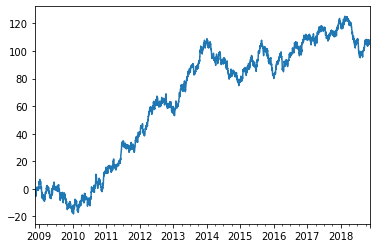

In [132]:
ts.plot()

In [133]:
ts["2014-01-01":"2016-01-01"] = np.NaN

<AxesSubplot:>

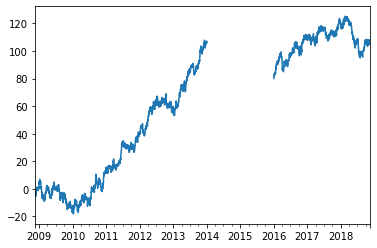

In [134]:
ts.plot()

In [135]:
rolling_avg = ts.rolling(window=90).mean()
rolling_avg

2008-11-18           NaN
2008-11-19           NaN
2008-11-20           NaN
2008-11-21           NaN
2008-11-22           NaN
                 ...    
2018-11-11    103.898995
2018-11-12    103.991165
2018-11-13    104.075431
2018-11-14    104.159374
2018-11-15    104.240824
Freq: D, Length: 3650, dtype: float64

<AxesSubplot:>

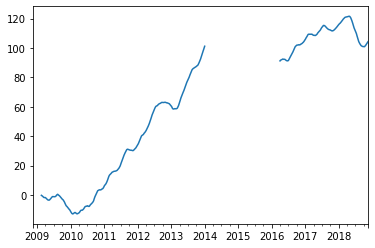

In [136]:
rolling_avg.plot()

## File operations

In [137]:
# CSV
# Writing to a csv file.

In [138]:
df.to_csv("testing.csv")

In [ ]:
# Reading from csv


In [139]:
new_df = pd.read_csv("testing.csv", index_col=0)
new_df.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


In [ ]:
# Excel

In [141]:
# this will raise an error if 'openpyxl' package is not installed
df.to_excel('myx.xlsx', sheet_name='Sheet1')


In [144]:
df6=pd.read_excel('myx.xlsx', 'Sheet1', index_col=0, na_values=['NA'])

In [145]:
df6.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


In [ ]:
# basic DataFrame information:

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     6 non-null      object
 1   data    6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [147]:
df.info(memory_usage="deep") # more reliable info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     6 non-null      object
 1   data    6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 524.0 bytes
